In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eng-sat-dataset-for-merging/Final_v1_eng_santali.csv
/kaggle/input/eng-sat-dataset-for-merging/tatoeba_eng_santali .tsv
/kaggle/input/eng-sat-dataset-for-merging/bhasini_eng_santali.csv
/kaggle/input/eng-sat-dataset-for-merging/train.sat_Olck
/kaggle/input/eng-sat-dataset-for-merging/train.eng_Latn
/kaggle/input/eng-sat-dataset-for-merging/Final_v3_eng_santali.csv


In [2]:
file_path_olck = '/kaggle/input/eng-sat-dataset-for-merging/train.sat_Olck'
file_path_latn = '/kaggle/input/eng-sat-dataset-for-merging/train.eng_Latn'

merged_eng_latn_path = 'merged.eng_Latn'
merged_sat_olck_path = 'merged.sat_Olck'

def copy_file(source_path, target_path):
    with open(source_path, 'r', encoding='utf-8') as source_file:
        with open(target_path, 'w', encoding='utf-8') as target_file:
            target_file.write(source_file.read())

copy_file(file_path_latn, merged_eng_latn_path)
copy_file(file_path_olck, merged_sat_olck_path)

print("Files have been successfully merged!")


Files have been successfully merged!


In [3]:
import pandas as pd

csv_file_path = '/kaggle/input/eng-sat-dataset-for-merging/bhasini_eng_santali.csv'
data = pd.read_csv(csv_file_path)

merged_eng_latn_path = 'merged.eng_Latn'
merged_sat_olck_path = 'merged.sat_Olck'

with open(merged_eng_latn_path, 'a', encoding='utf-8') as file:
    for text in data['sourceText']:
        file.write(text + '\n')

with open(merged_sat_olck_path, 'a', encoding='utf-8') as file:
    for text in data['targetText']:
        file.write(text + '\n')

print("Data has been successfully appended to the merged files!")


Data has been successfully appended to the merged files!


In [4]:
import pandas as pd

csv_file_path = '/kaggle/input/eng-sat-dataset-for-merging/Final_v1_eng_santali.csv'
data = pd.read_csv(csv_file_path)

merged_eng_latn_path = 'merged.eng_Latn'
merged_sat_olck_path = 'merged.sat_Olck'

with open(merged_eng_latn_path, 'a', encoding='utf-8') as file:
    for text in data['Source (en)']:
        file.write(text + '\n')

with open(merged_sat_olck_path, 'a', encoding='utf-8') as file:
    for text in data['Target (sat)']:
        file.write(text + '\n')

print("Data has been successfully appended to the merged files!")


Data has been successfully appended to the merged files!


In [5]:
import pandas as pd

csv_file_path = '/kaggle/input/eng-sat-dataset-for-merging/Final_v3_eng_santali.csv'
data = pd.read_csv(csv_file_path)

merged_eng_latn_path = 'merged.eng_Latn'
merged_sat_olck_path = 'merged.sat_Olck'

with open(merged_eng_latn_path, 'a', encoding='utf-8') as eng_file, \
     open(merged_sat_olck_path, 'a', encoding='utf-8') as sat_file:
    
    for index, row in data.iterrows():
        source_text = row['Source (en)']
        target_text = row['Target (sat)']
        
        if pd.notna(source_text) and pd.notna(target_text):
            eng_file.write(str(source_text) + '\n')
            sat_file.write(str(target_text) + '\n')

print("Data has been successfully appended to the merged files!")

Data has been successfully appended to the merged files!


In [6]:
import pandas as pd

tsv_file_path = '/kaggle/input/eng-sat-dataset-for-merging/tatoeba_eng_santali .tsv'
data = pd.read_csv(tsv_file_path, sep='\t', header=None)

merged_eng_latn_path = 'merged.eng_Latn'
merged_sat_olck_path = 'merged.sat_Olck'

with open(merged_eng_latn_path, 'a', encoding='utf-8') as file:
    for text in data[3]:
        file.write(str(text) + '\n')

with open(merged_sat_olck_path, 'a', encoding='utf-8') as file:
    for text in data[1]:
        file.write(str(text) + '\n')

print("Data has been successfully appended to the merged files!")


Data has been successfully appended to the merged files!


,Ratio,Count
0,0.878378,9
1,1.040541,8
2,1.147541,9
3,1.008065,5
4,0.850575,11
...,...,...
5848,1.012270,1
5849,1.430657,1
5850,1.093168,1
5851,0.807107,1


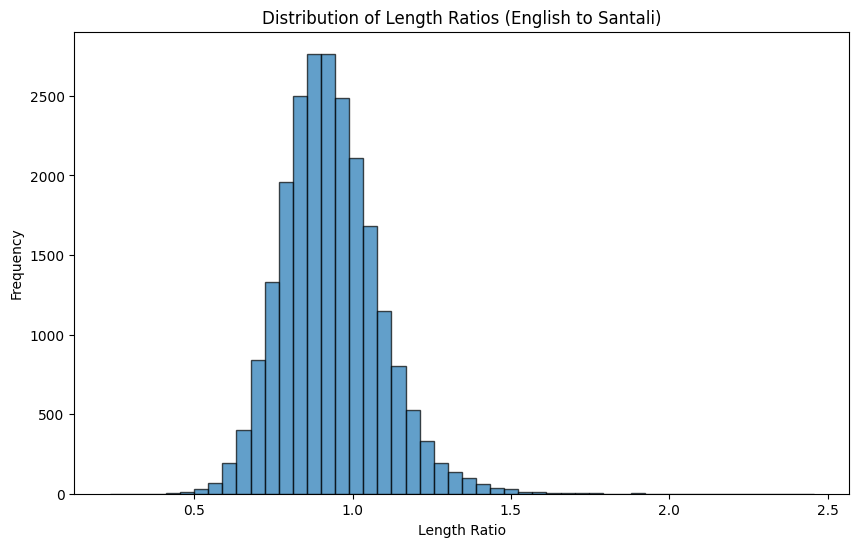

Largest Ratio: 2.457627118644068
Smallest Ratio: 0.23295454545454544
Mean Ratio: 0.9304031938399304
Mode Ratio: 1.0
Total Unique Ratios: 5853


In [10]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# Load the English and Santali sentences from the given file paths
with open('/kaggle/input/eng-sat-dataset-for-merging/train.eng_Latn', 'r', encoding='utf-8') as f:
    eng_sentences = f.readlines()

with open('/kaggle/input/eng-sat-dataset-for-merging/train.sat_Olck', 'r', encoding='utf-8') as f:
    sat_sentences = f.readlines()

# Ensure that both files have the same number of sentences
assert len(eng_sentences) == len(sat_sentences), "The English and Santali datasets have different number of lines."

# Strip leading/trailing whitespaces and calculate the length of each sentence
eng_lengths = [len(sentence.strip()) for sentence in eng_sentences]
sat_lengths = [len(sentence.strip()) for sentence in sat_sentences]

# Calculate the ratio of English to Santali sentence lengths, handling any zero-length cases
ratios = [eng_len / sat_len if sat_len != 0 else np.nan for eng_len, sat_len in zip(eng_lengths, sat_lengths)]

# Remove NaN values (those with 0 length Santali sentences)
ratios = [ratio for ratio in ratios if not np.isnan(ratio)]

# Calculate required statistics
largest_ratio = max(ratios)
smallest_ratio = min(ratios)
mean_ratio = np.mean(ratios)
mode_ratio = Counter(ratios).most_common(1)[0][0]

# Frequency count of all ratios
ratio_counts = Counter(ratios)
ratio_df = pd.DataFrame(ratio_counts.items(), columns=["Ratio", "Count"])

# Display the DataFrame directly
display(ratio_df)

# Plot the distribution of ratios
plt.figure(figsize=(10, 6))
plt.hist(ratios, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Length Ratios (English to Santali)')
plt.xlabel('Length Ratio')
plt.ylabel('Frequency')
plt.show()

# Display key statistics
statistics = {
    "Largest Ratio": largest_ratio,
    "Smallest Ratio": smallest_ratio,
    "Mean Ratio": mean_ratio,
    "Mode Ratio": mode_ratio,
    "Total Unique Ratios": len(ratio_counts)
}

# Print the statistics
for key, value in statistics.items():
    print(f"{key}: {value}")


,Ratio,Count
0,0.878378,9
1,1.040541,8
2,1.147541,9
3,1.008065,5
4,0.850575,11
...,...,...
5848,1.012270,1
5849,1.430657,1
5850,1.093168,1
5851,0.807107,1


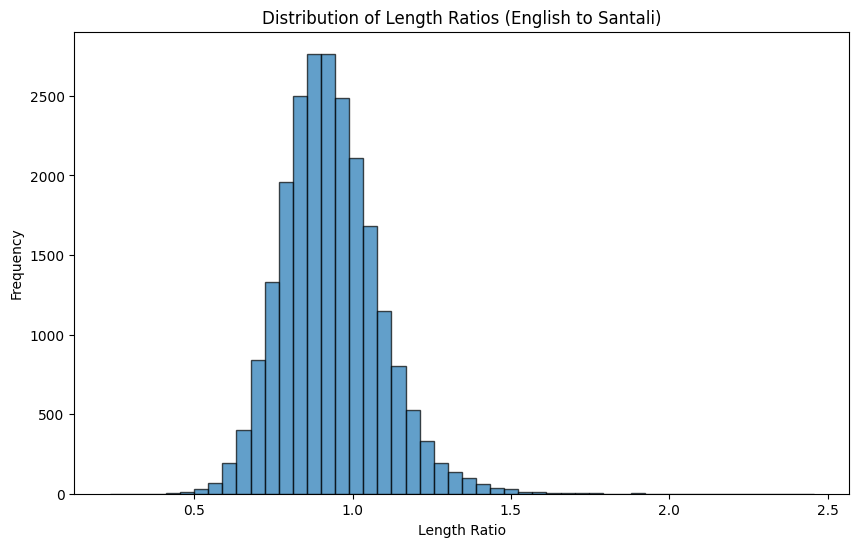

Largest Ratio: 2.457627118644068
Smallest Ratio: 0.23295454545454544
Mean Ratio: 0.9304031938399304
Mode Ratio: 1.0
Total Unique Ratios: 5853

Detailed Count of Samples for Each Ratio:
Ratio: 1.000000 | Count: 530
Ratio: 0.750000 | Count: 80
Ratio: 0.833333 | Count: 79
Ratio: 0.800000 | Count: 74
Ratio: 0.857143 | Count: 74
Ratio: 0.900000 | Count: 71
Ratio: 0.888889 | Count: 66
Ratio: 0.875000 | Count: 60
Ratio: 0.818182 | Count: 56
Ratio: 0.923077 | Count: 46
Ratio: 0.909091 | Count: 46
Ratio: 0.846154 | Count: 44
Ratio: 0.933333 | Count: 44
Ratio: 0.777778 | Count: 44
Ratio: 0.916667 | Count: 41
Ratio: 0.928571 | Count: 40
Ratio: 0.882353 | Count: 36
Ratio: 0.941176 | Count: 35
Ratio: 1.200000 | Count: 35
Ratio: 1.076923 | Count: 35
Ratio: 0.904762 | Count: 34
Ratio: 0.937500 | Count: 33
Ratio: 0.842105 | Count: 32
Ratio: 1.090909 | Count: 32
Ratio: 0.769231 | Count: 32
Ratio: 0.894737 | Count: 32
Ratio: 1.125000 | Count: 32
Ratio: 0.952381 | Count: 32
Ratio: 0.944444 | Count: 32
Ra

In [11]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# Load the English and Santali sentences from the given file paths
with open('/kaggle/input/eng-sat-dataset-for-merging/train.eng_Latn', 'r', encoding='utf-8') as f:
    eng_sentences = f.readlines()

with open('/kaggle/input/eng-sat-dataset-for-merging/train.sat_Olck', 'r', encoding='utf-8') as f:
    sat_sentences = f.readlines()

# Ensure that both files have the same number of sentences
assert len(eng_sentences) == len(sat_sentences), "The English and Santali datasets have different number of lines."

# Strip leading/trailing whitespaces and calculate the length of each sentence
eng_lengths = [len(sentence.strip()) for sentence in eng_sentences]
sat_lengths = [len(sentence.strip()) for sentence in sat_sentences]

# Calculate the ratio of English to Santali sentence lengths, handling any zero-length cases
ratios = [eng_len / sat_len if sat_len != 0 else np.nan for eng_len, sat_len in zip(eng_lengths, sat_lengths)]

# Remove NaN values (those with 0 length Santali sentences)
ratios = [ratio for ratio in ratios if not np.isnan(ratio)]

# Calculate required statistics
largest_ratio = max(ratios)
smallest_ratio = min(ratios)
mean_ratio = np.mean(ratios)
mode_ratio = Counter(ratios).most_common(1)[0][0]

# Frequency count of all ratios
ratio_counts = Counter(ratios)
ratio_df = pd.DataFrame(ratio_counts.items(), columns=["Ratio", "Count"])

# Display the DataFrame directly
display(ratio_df)

# Plot the distribution of ratios
plt.figure(figsize=(10, 6))
plt.hist(ratios, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Length Ratios (English to Santali)')
plt.xlabel('Length Ratio')
plt.ylabel('Frequency')
plt.show()

# Display key statistics
statistics = {
    "Largest Ratio": largest_ratio,
    "Smallest Ratio": smallest_ratio,
    "Mean Ratio": mean_ratio,
    "Mode Ratio": mode_ratio,
    "Total Unique Ratios": len(ratio_counts)
}

# Print the statistics
for key, value in statistics.items():
    print(f"{key}: {value}")

# Print detailed count of samples with each ratio
print("\nDetailed Count of Samples for Each Ratio:")
for ratio, count in ratio_counts.most_common():
    print(f"Ratio: {ratio:.6f} | Count: {count}")


Count of Samples in Each Ratio Range:
Range 0.0-0.1: 0 samples
Range 0.1-0.2: 0 samples
Range 0.2-0.3: 1 samples
Range 0.3-0.4: 0 samples
Range 0.4-0.5: 11 samples
Range 0.5-0.6: 144 samples
Range 0.6-0.7: 922 samples
Range 0.7-0.8: 3164 samples
Range 0.8-0.9: 5777 samples
Range 0.9-1.0: 5605 samples
Range 1.0-1.1: 4096 samples
Range 1.1-1.2: 1772 samples
Range 1.2-1.3: 638 samples
Range 1.3-1.4: 259 samples
Range 1.4-1.5: 84 samples
Range 1.5-1.6: 38 samples
Range 1.6-1.7: 13 samples
Range 1.7-1.8: 5 samples
Range 1.8-1.9: 4 samples
Range 1.9-2.0: 1 samples


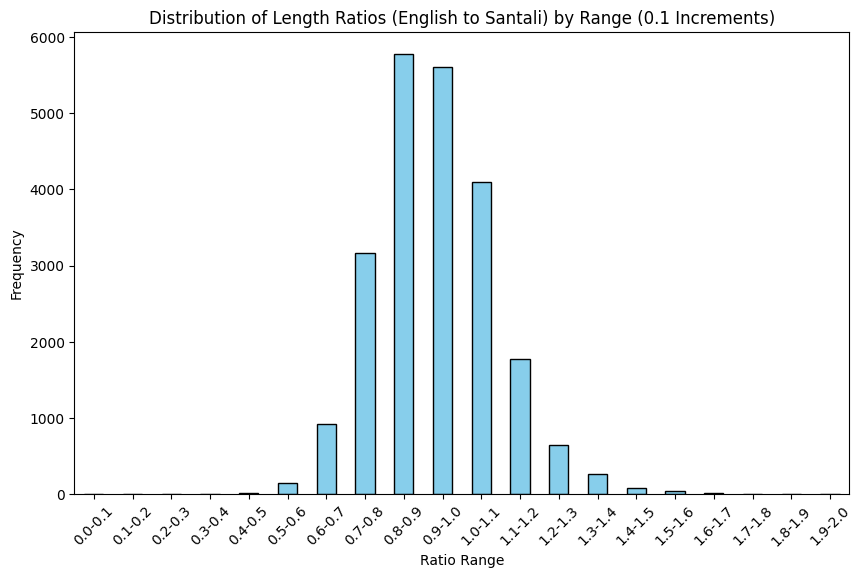

In [12]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# Load the English and Santali sentences from the given file paths
with open('/kaggle/input/eng-sat-dataset-for-merging/train.eng_Latn', 'r', encoding='utf-8') as f:
    eng_sentences = f.readlines()

with open('/kaggle/input/eng-sat-dataset-for-merging/train.sat_Olck', 'r', encoding='utf-8') as f:
    sat_sentences = f.readlines()

# Ensure that both files have the same number of sentences
assert len(eng_sentences) == len(sat_sentences), "The English and Santali datasets have different number of lines."

# Strip leading/trailing whitespaces and calculate the length of each sentence
eng_lengths = [len(sentence.strip()) for sentence in eng_sentences]
sat_lengths = [len(sentence.strip()) for sentence in sat_sentences]

# Calculate the ratio of English to Santali sentence lengths, handling any zero-length cases
ratios = [eng_len / sat_len if sat_len != 0 else np.nan for eng_len, sat_len in zip(eng_lengths, sat_lengths)]

# Remove NaN values (those with 0 length Santali sentences)
ratios = [ratio for ratio in ratios if not np.isnan(ratio)]

# Define the bins or ranges for categorizing the ratios with smaller steps (0.1 increments)
bins = np.arange(0, 2.1, 0.1)  # Bins from 0 to 2.0 with 0.1 increments
bin_labels = [f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)]

# Categorize the ratios into bins
binned_ratios = pd.cut(ratios, bins=bins, labels=bin_labels, right=False)

# Count the number of samples in each bin
binned_counts = binned_ratios.value_counts().sort_index()

# Display the counts for each bin
print("Count of Samples in Each Ratio Range:")
for bin_label, count in binned_counts.items():
    print(f"Range {bin_label}: {count} samples")

# Plot the distribution of the binned ratios
plt.figure(figsize=(10, 6))
binned_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Length Ratios (English to Santali) by Range (0.1 Increments)')
plt.xlabel('Ratio Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
